In [9]:
import sys

from scipy.stats import alpha

sys.path.append("")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_pipeline.fetcher.yfinance_fetcher import fetch_ohlcv, fetch_multiple_tickers

In [10]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

In [11]:
ticker = 'AAPL'
df = fetch_ohlcv(ticker,start='2020-01-01')
df.head()

2025-10-01 19:34:46,785  - INFO - Fetching OHLCV data from AAPL from 2020-01-01 to  2025-10-01
2025-10-01 19:34:47,637  - INFO - Downloaded 1444 rows for ticker AAPL


,date,open,high,low,close,adj_close,volume,dividends,splits,ticker
0,2020-01-02 00:00:00-05:00,74.059998,75.150002,73.797501,75.087502,72.538506,135480400,0.0,0.0,AAPL
1,2020-01-03 00:00:00-05:00,74.287498,75.144997,74.125000,74.357498,71.833298,146322800,0.0,0.0,AAPL
2,2020-01-06 00:00:00-05:00,73.447502,74.989998,73.187500,74.949997,72.405678,118387200,0.0,0.0,AAPL
3,2020-01-07 00:00:00-05:00,74.959999,75.224998,74.370003,74.597504,72.065163,108872000,0.0,0.0,AAPL
4,2020-01-08 00:00:00-05:00,74.290001,76.110001,74.290001,75.797501,73.224403,132079200,0.0,0.0,AAPL


In [12]:
df[['open','high','low','close','volume']].describe()

,open,high,low,close,volume
count,1444.000000,1444.000000,1444.000000,1444.000000,1.444000e+03
mean,162.400520,164.243814,160.712062,162.567867,8.627633e+07
std,44.939998,45.240075,44.670974,44.996035,5.166892e+07
min,57.020000,57.125000,53.152500,56.092499,2.323470e+07
25%,133.517502,134.889999,131.705002,133.462498,5.228490e+07
50%,163.135002,165.404999,161.135002,163.699997,7.199655e+07
75%,192.592503,194.399994,191.237495,192.622501,1.024412e+08
max,258.190002,260.100006,257.630005,259.019989,4.265100e+08


In [13]:
df.isnull().sum()

date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dividends    0
splits       0
ticker       0
dtype: int64

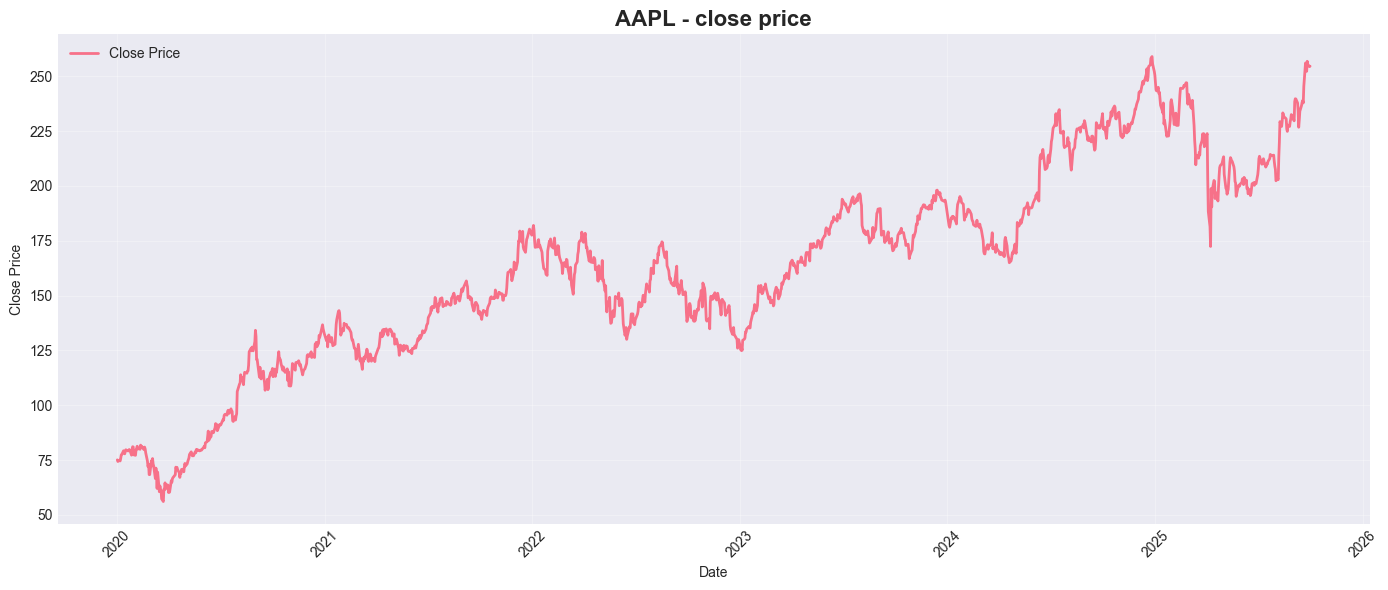

In [14]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(df['date'],df['close'], label='Close Price', linewidth=2)
ax.set_title(f'{ticker} - close price',fontsize=16,fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.legend()
ax.grid(True,alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

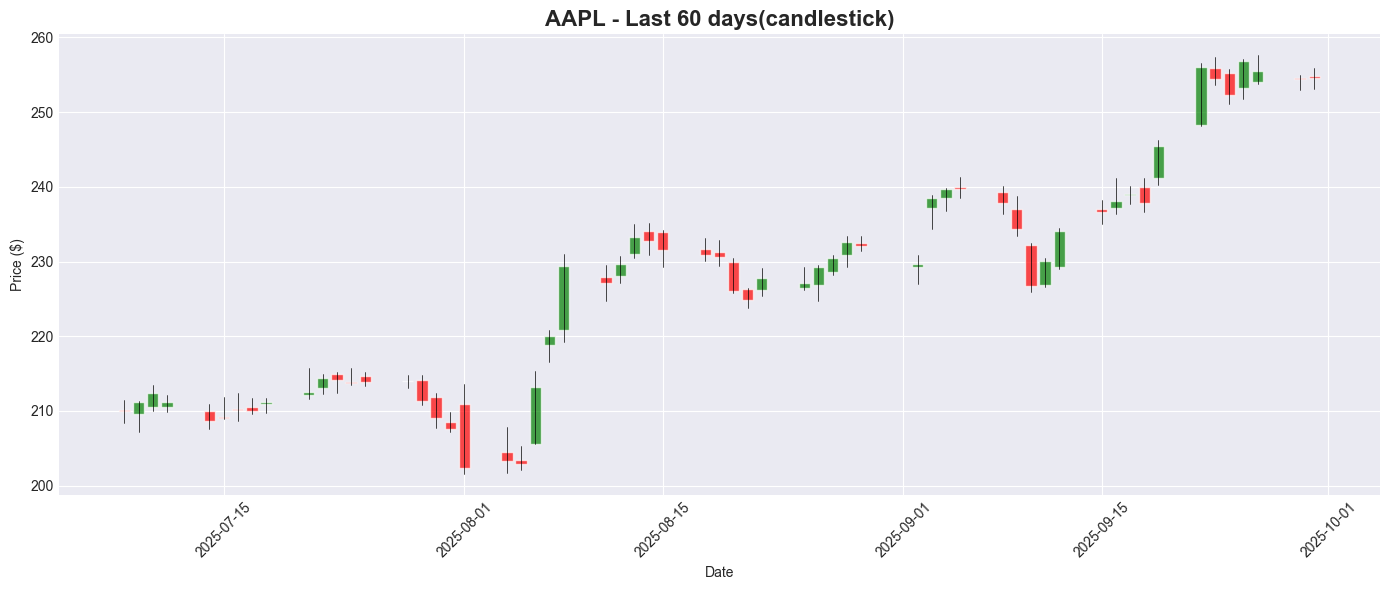

In [16]:
## candlestick last 60 days
df_recent = df.tail(60).copy()

fig, ax = plt.subplots(figsize=(14,6))

colors = ['green' if close >= open_ else 'red'
          for open_,close in zip(df_recent['open'],df_recent['close'])]
ax.bar(df_recent['date'],df_recent['close']-df_recent['open'],
       bottom = df_recent['open'],color=colors, alpha=0.7, width=0.8)

for idx, row in df_recent.iterrows():
    ax.plot([row['date'],row['date']],[row['low'],row['high']], color='black', linewidth=0.5)

ax.set_title(f'{ticker} - Last 60 days(candlestick)',fontsize=16,fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

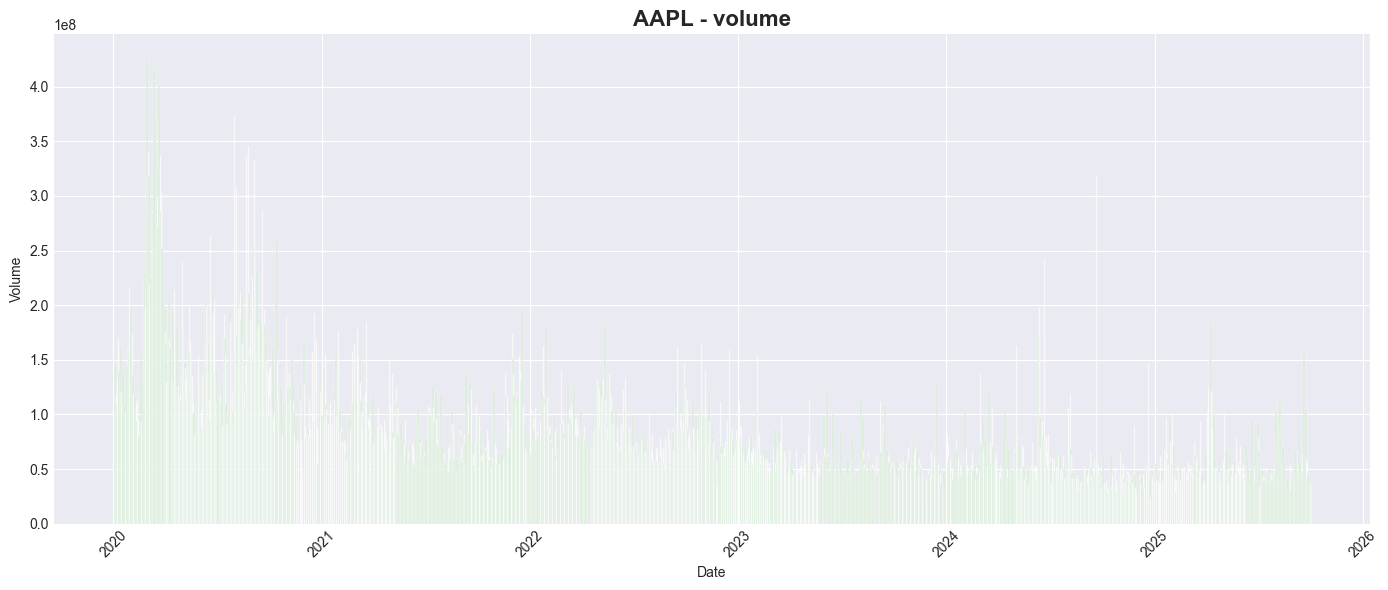

In [20]:
fig, ax = plt.subplots(figsize=(14,6))
ax.bar(df['date'],df['volume'],alpha=0.7,color='green')
ax.set_title(f'{ticker} - volume',fontsize=16,fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
df['daily_return'] = df['adj_close'].pct_change()
df['log_return'] = np.log(df['adj_close']/df['adj_close'].shift(1))

df[['daily_return','log_return']].describe()

,daily_return,log_return
count,1443.000000,1443.000000
mean,0.001077,0.000870
std,0.020349,0.020304
min,-0.128647,-0.137708
25%,-0.008423,-0.008459
50%,0.001140,0.001139
75%,0.011767,0.011698
max,0.153288,0.142617


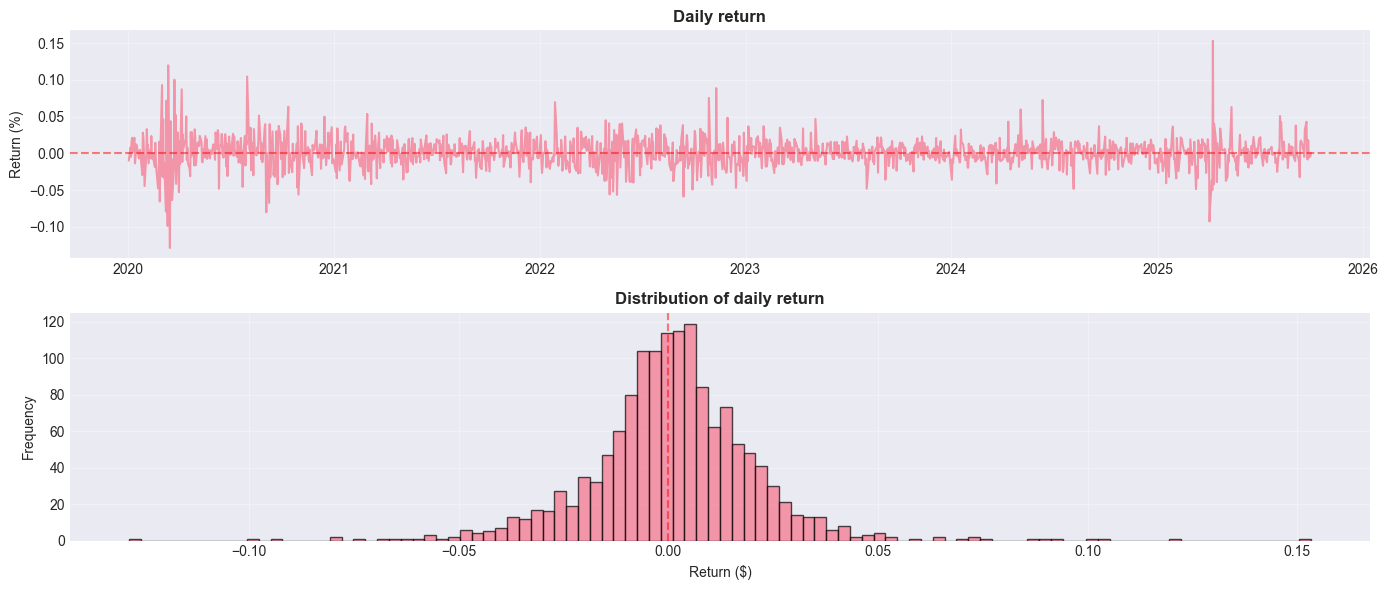

In [23]:
fig,axes = plt.subplots(2,1, figsize=(14,6))

axes[0].plot(df['date'],df['daily_return'],alpha = 0.7)
axes[0].axhline(y=0,color='red',linestyle='--',alpha=0.5)
axes[0].set_title('Daily return', fontweight='bold')
axes[0].set_ylabel('Return (%)')
axes[0].grid(True,alpha=0.3)

axes[1].hist(df['daily_return'].dropna(),bins=100,alpha=0.7,edgecolor='black')
axes[1].set_title('Distribution of daily return', fontweight='bold')
axes[1].set_xlabel('Return ($)')
axes[1].set_ylabel('Frequency')
axes[1].axvline(x=0,color='red',linestyle='--',alpha=0.5)
axes[1].grid(True,alpha=0.3)

plt.tight_layout()
plt.show()

In [24]:
mean_daily_return = df['log_return'].mean()
annual_return = mean_daily_return * 252

daily_volatility = df['log_return'].std()
annual_volatility = daily_volatility * 252
print(f"Annual mean return: {annual_return:.2%}")
print(f"Annual difference: {annual_volatility:.2%}")
print(f"Sharpe Ratio: {annual_return / annual_volatility:.2f}")

Annual mean return: 21.93%
Annual difference: 511.67%
Sharpe Ratio: 0.04


In [25]:
tickers = ['AAPL','MSFT','GOOGL','TSLA','AMZN']
df_multi = fetch_multiple_tickers(tickers,start='2020-01-01')
df_multi.groupby('ticker').size()

2025-10-01 21:49:44,377  - INFO - Fetching data for multiple tickers: ['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'AMZN']
2025-10-01 21:49:44,379  - INFO - Fetching OHLCV data from AAPL from 2020-01-01 to  2025-10-01
2025-10-01 21:49:44,410  - INFO - Downloaded 1444 rows for ticker AAPL
2025-10-01 21:49:44,411  - INFO - Fetching OHLCV data from MSFT from 2020-01-01 to  2025-10-01
2025-10-01 21:49:44,737  - INFO - Downloaded 1444 rows for ticker MSFT
2025-10-01 21:49:44,738  - INFO - Fetching OHLCV data from GOOGL from 2020-01-01 to  2025-10-01
2025-10-01 21:49:44,897  - INFO - Downloaded 1444 rows for ticker GOOGL
2025-10-01 21:49:44,897  - INFO - Fetching OHLCV data from TSLA from 2020-01-01 to  2025-10-01
2025-10-01 21:49:45,011  - INFO - Downloaded 1444 rows for ticker TSLA
2025-10-01 21:49:45,012  - INFO - Fetching OHLCV data from AMZN from 2020-01-01 to  2025-10-01
2025-10-01 21:49:45,215  - INFO - Downloaded 1444 rows for ticker AMZN
2025-10-01 21:49:45,220  - INFO - Combined data for mult

ticker
AAPL     1444
AMZN     1444
GOOGL    1444
MSFT     1444
TSLA     1444
dtype: int64

C:\Users\ibuko\AppData\Local\Temp\ipykernel_20252\2918831368.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_multi = df_multi.groupby('ticker', group_keys=False).apply(normalize_prices)


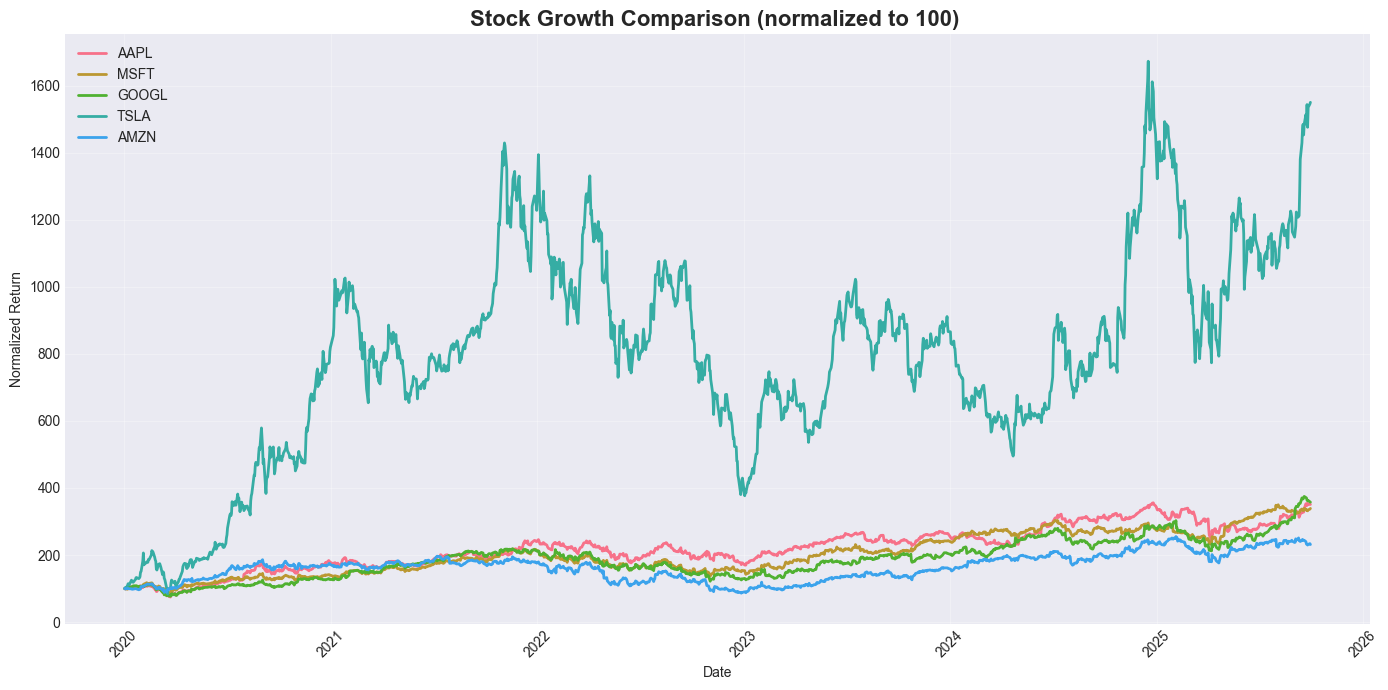

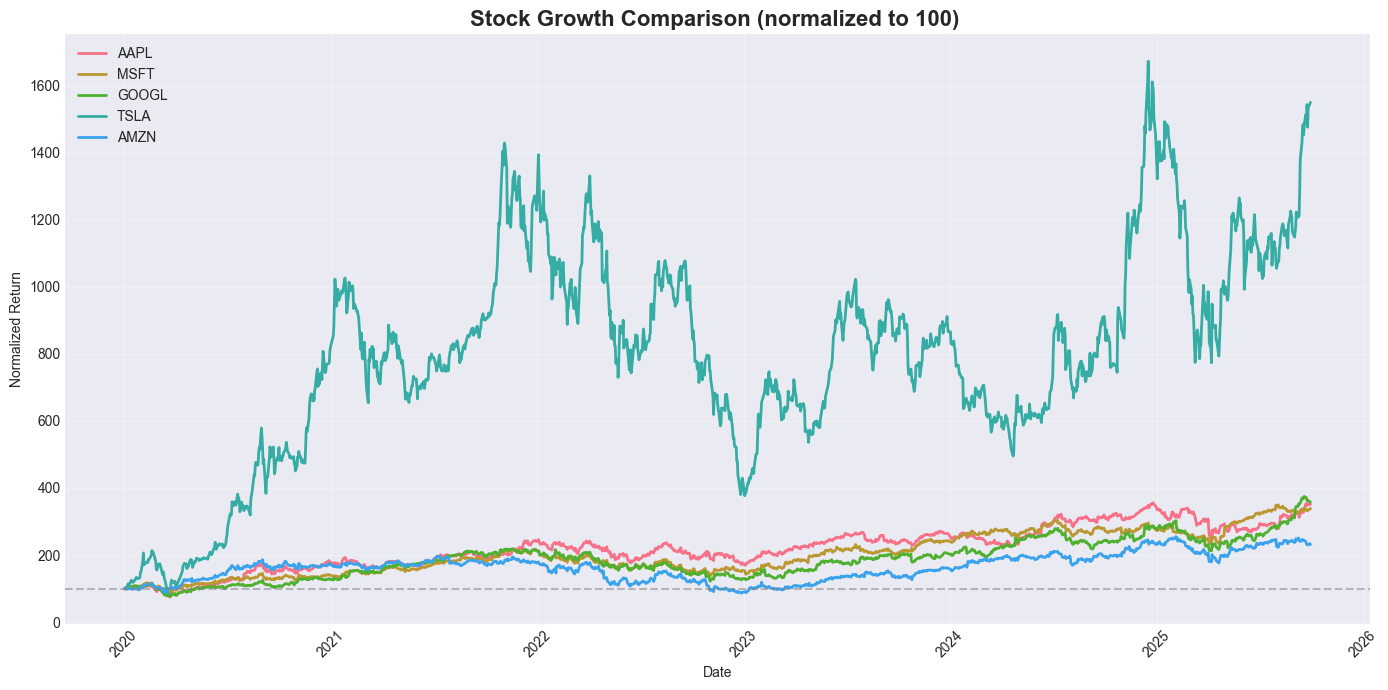

In [31]:
def normalize_prices(group):
    first_price = group['adj_close'].iloc[0]
    group['normalized'] = (group['adj_close'] / first_price)*100
    group['log_return'] = np.log(group['adj_close'] / group['adj_close'].shift(1))
    return group

df_multi = df_multi.groupby('ticker', group_keys=False).apply(normalize_prices)

#df_multi['log_return'] = df_multi.groupby('ticker')['adj_close'].apply(lambda x: np.log(x / x.shift(1)))


fig,ax = plt.subplots(figsize=(14,7))

for ticker in tickers:
    ticker_data = df_multi[df_multi['ticker'] == ticker]
    ax.plot(ticker_data['date'],ticker_data['normalized'],label=ticker,linewidth=2)

ax.set_title('Stock Growth Comparison (normalized to 100) ', fontsize = 16, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Normalized Return')
ax.legend(loc='best')
plt.xticks(rotation=45)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
fig, ax = plt.subplots(figsize=(14, 7))

for ticker in tickers:
    ticker_data = df_multi[df_multi['ticker'] == ticker]
    ax.plot(ticker_data['date'], ticker_data['normalized'],
            label=ticker, linewidth=2)

ax.set_title('Stock Growth Comparison (normalized to 100) ',
             fontsize=16, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Normalized Return')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
ax.axhline(y=100, color='gray', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

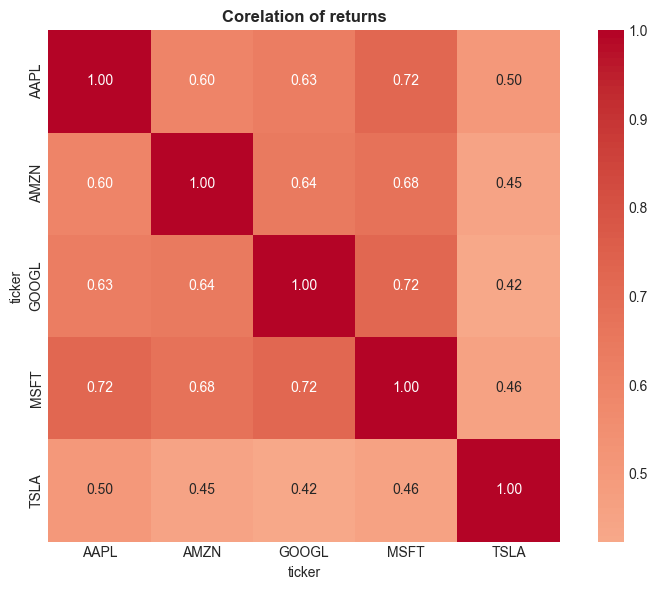

In [32]:
pivot_returns = df_multi.pivot_table(
    index='date',
    columns='ticker',
    values='log_return'
)

correlation_matrix = pivot_returns.corr()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f',
            cmap='coolwarm', center=0, square=True, ax=ax)
ax.set_title('Corelation of returns', fontweight='bold')
plt.tight_layout()
plt.show()

In [37]:
ticker = 'NVDA'
df_nvda = fetch_ohlcv(ticker,start='2020-01-01')



2025-10-01 22:40:04,324  - INFO - Fetching OHLCV data from NVDA from 2020-01-01 to  2025-10-01
2025-10-01 22:40:04,348  - INFO - Downloaded 1444 rows for ticker NVDA


In [38]:
df_nvda.columns

Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume',
       'dividends', 'splits', 'ticker'],
      dtype='object')

In [40]:
df_nvda['daily_return'] = df_nvda['adj_close'].pct_change()
df_nvda['cumulative_return'] = (1 + df_nvda['daily_return']).cumprod()
df_nvda['running_max'] = df_nvda['cumulative_return'].cummax()
df_nvda['drawdown'] = (df_nvda['cumulative_return'] - df_nvda['running_max'])/df_nvda['running_max']
max_drawdown = df_nvda['drawdown'].min()
max_drawdown

np.float64(-0.6633509779918761)

In [42]:
max_gain_day = df_nvda.loc[df_nvda['daily_return'].idxmax(),'date']
max_loss_day = df_nvda.loc[df_nvda['daily_return'].idxmin(),'date']

print(f"Day of the biggest growth: {max_gain_day}")
print(f"Day of the biggest decrease : {max_loss_day}")

Day of the biggest growth: 2023-05-25 00:00:00-04:00
Day of the biggest decrease : 2020-03-16 00:00:00-04:00


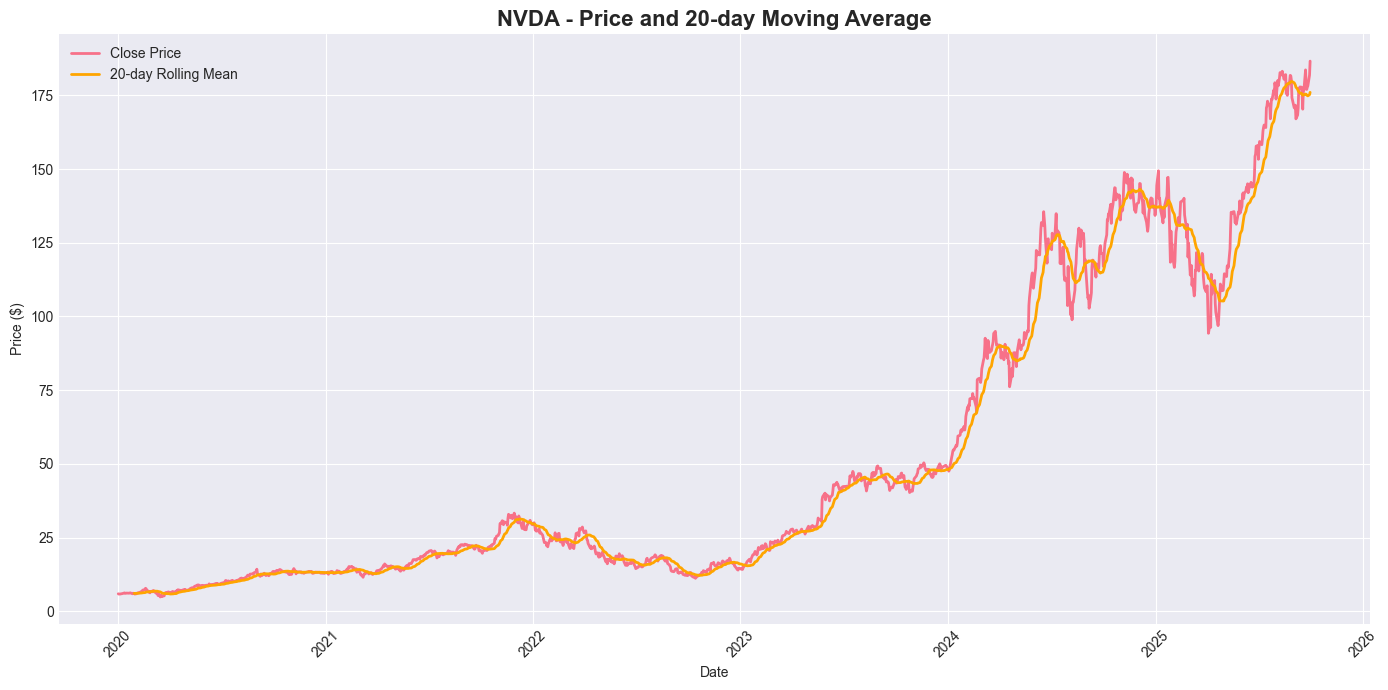

In [46]:
df_nvda['rolling_mean_20'] = df_nvda['adj_close'].rolling(window=20).mean()
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(df_nvda['date'],df_nvda['adj_close'],label='Close Price',linewidth=2)
ax.plot(df_nvda['date'], df_nvda['rolling_mean_20'], label='20-day Rolling Mean', linewidth=2, color='orange')
ax.set_title(f'{ticker} - Price and 20-day Moving Average', fontsize=16, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ticker
AAPL     0.322322
AMZN     0.358240
GOOGL    0.325880
MSFT     0.299221
TSLA     0.671058
Name: log_return, dtype: float64


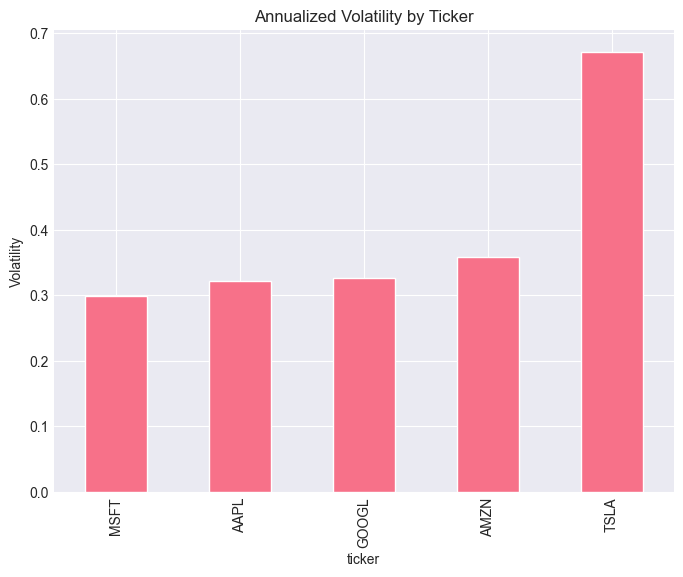

In [47]:
volatility = df_multi.groupby('ticker')['log_return'].std() * np.sqrt(252)  # annualized volatility
print(volatility)

# Wykres
volatility.sort_values().plot(kind='bar', figsize=(8,6), title='Annualized Volatility by Ticker')
plt.ylabel('Volatility')
plt.show()
